# Load the dataset and perform exploratory data analysis (EDA)

Mount to Google Drive

In [1]:
# Mount to Google Drive

from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


Load dataset and import packages

In [5]:
# import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

%matplotlib inline

In [3]:
# Load the dataset
df = pd.read_csv("https://github.com/ArinB/MSBA-CA-Data/raw/main/CA06/Mall_Customers.csv")

Check dataset

In [4]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
# Check for missing values
print(df.isnull().sum())

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


Visualize EDA finding

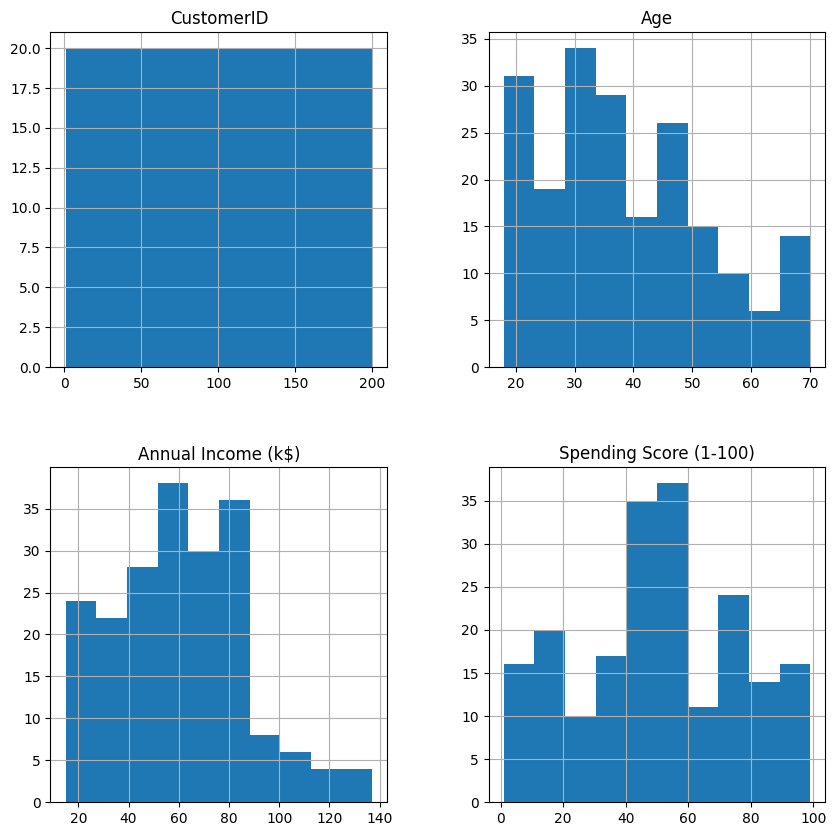

In [7]:
# Visualize the distribution of features using histograms
df.hist(figsize=(10,10))
plt.show()

# Prepare the data for clustering

Get data ready for feature scaling

In [9]:
# Perform feature scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['Annual Income (k$)', 'Spending Score (1-100)']])
df_scaled = pd.DataFrame(df_scaled, columns=['Annual Income (k$)', 'Spending Score (1-100)'])


In [10]:
# Create a new DataFrame with only the selected features
X = df_scaled[['Annual Income (k$)', 'Spending Score (1-100)']]

# Implement k-means clustering

In [11]:
# Import the KMeans class from the sklearn.cluster module
from sklearn.cluster import KMeans

In [13]:
# Use the Silhouette Method to determine the optimal number of clusters
from sklearn.metrics import silhouette_score

silhouette_scores = []
for i in range(2,11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

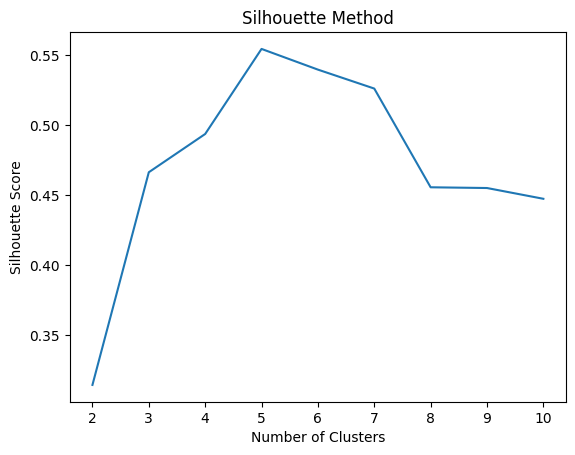

In [14]:
plt.plot(range(2,11), silhouette_scores)
plt.title("Silhouette Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

In [15]:
# Train the KMeans model with the optimal number of clusters
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

In [16]:
# Obtain the cluster assignments for each data point
cluster_labels = kmeans.labels_

# Visualize and analyze the clusters

Text(0, 0.5, 'Spending')

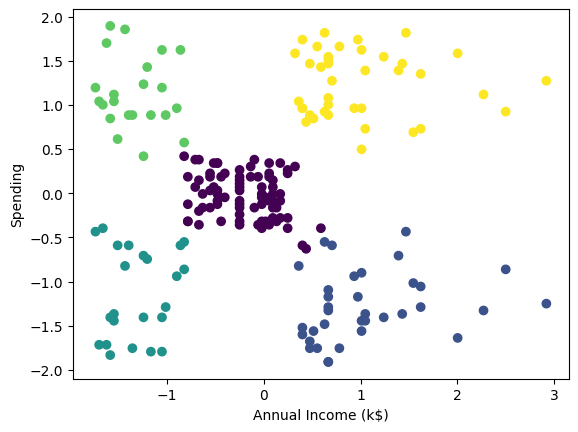

In [18]:
# Create a scatter plot of the selected features, colored by cluster assignment
plt.scatter(X.iloc[:,0], X.iloc[:,1], c=cluster_labels, cmap='viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending')

# Summary

A: Summary of Dataset

The data includes information about customers of a mall, such as their unique CustomerID, gender (Genre), annual income in thousands of dollars, and spending score assigned by the mall.

B: Data Preparation and Scaling

The data was prepared and scaled by selecting the "Annual Income" and "Spending Score" features for clustering. The MinMax scaler was applied to ensure equal scaling, and a new dataframe named cluster_df was created using these scaled features.

C: Identifying the Optimal Cluster Number

The Silhouette Method was used to determine the ideal number of clusters, which resulted in the highest Silhouette Score.

D: Clustering and Characteristics of Clusters

K-Means clustering was employed to segment customers based on selected features, and a scatter plot was created to visualize these clusters, displaying the relationship between annual income and spending score.

E: Findings and Recommendations

Cluster 0 (Middle income-middle spending): This group may be interested in a combination of affordable and premium products with value-added services. Therefore, it is advisable to focus on loyalty programs and personalized promotions.

Cluster 1 (High income-low spending): Personalized marketing and tailored incentives are suggested to appeal to this group.

Cluster 2 (Low income-low spending): To attract this group, the focus should be on affordable products and discounts.

Cluster 3 (Low income-high spending): Exclusive deals or memberships that provide better value may be used to appeal to this group.

Cluster 4 (High income-high spending): Premium products and services should be emphasized with a focus on quality and exclusivity in marketing campaigns.